<a href="https://colab.research.google.com/github/maniksingh10/ML/blob/main/CustomerSegmentation_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#data.info()
#data.isnull().sum()

In [ ]:
X= data.iloc[:,[3,4]].values

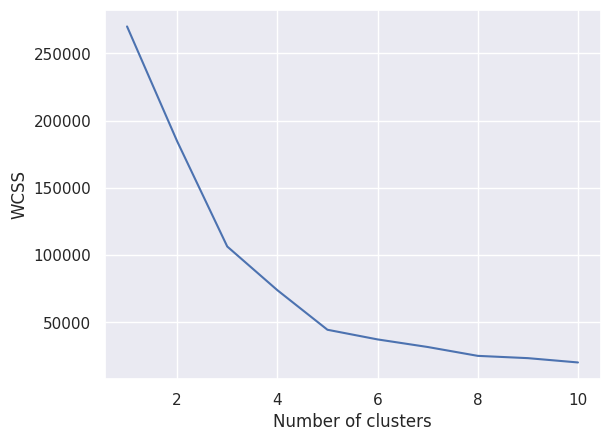

In [ ]:
#choosing the no of clusters (elbow method)

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state= 10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

#elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#clusters = 5
#training the model

kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 10 )

Y = kmeans.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


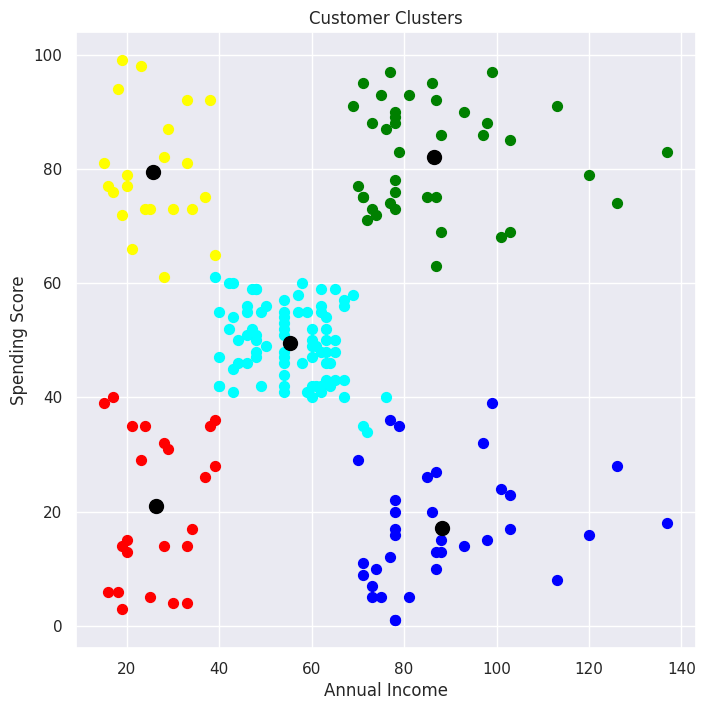

In [ ]:
#Visualizing Clusters

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='blue',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='cyan',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='green',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='red',label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Clusters')
plt.show()